-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Luis completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de visualización de datos y un buen dominio en la prueba de hipótesis, lo cual fortalece el análisis de los datos con los que has trabajado. Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trips_by_company = pd.read_csv('/Users/lcamacho/Triple Ten/Sprint 8/moved_project_sql_result_01.csv')
average_trips_by_neighborhood = pd.read_csv('/Users/lcamacho/Triple Ten/Sprint 8/moved_project_sql_result_04.csv')

In [3]:

trips_by_company.info()
print(trips_by_company.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
average_trips_by_neighborhood.info()
print(average_trips_by_neighborhood.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [5]:
duplicates_company_full = trips_by_company.duplicated().sum()
print(f"Número de filas completamente duplicadas (todas las columnas): {duplicates_company_full}")

Número de filas completamente duplicadas (todas las columnas): 0


In [6]:
duplicates_company_name = trips_by_company['company_name'].duplicated().sum()
print(f"Número de nombres de compañía duplicados: {duplicates_company_name}")

Número de nombres de compañía duplicados: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

Además hiciste un buen trabajo comprobando la presencia de datos duplicados, esto es clave para verificar la integridad del dataset y evitar sesgos o errores al momento de analizar los datos

</div>

In [7]:
top_10_neighborhoods = average_trips_by_neighborhood.sort_values(
    by='average_trips', 
    ascending=False
).head(10)
print("Los 10 Principales Barrios de Finalización de Recorrido (Dropoff)")
print(top_10_neighborhoods)

Los 10 Principales Barrios de Finalización de Recorrido (Dropoff)
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lcamacho\AppData\Local\Temp\ipykernel_14080\1974267400.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


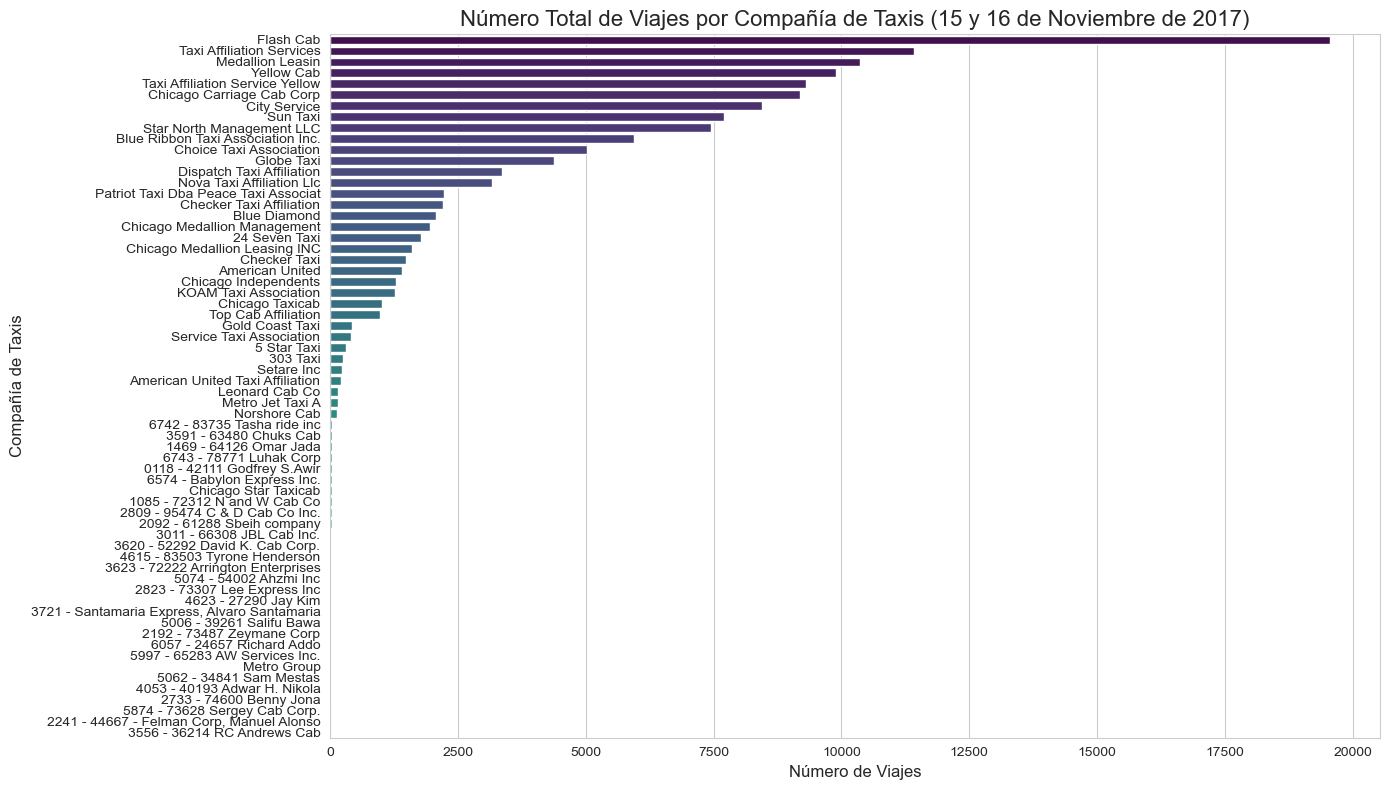

In [9]:
sns.set_style("whitegrid")
trips_by_company_sorted = trips_by_company.sort_values(by='trips_amount', ascending=False)
top_10_neighborhoods = average_trips_by_neighborhood.sort_values(
    by='average_trips', 
    ascending=False
).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(
    x='trips_amount', 
    y='company_name', 
    data=trips_by_company_sorted,
    palette='viridis' # Esquema de color
)
plt.title(
    'Número Total de Viajes por Compañía de Taxis (15 y 16 de Noviembre de 2017)', 
    fontsize=16
)
plt.xlabel('Número de Viajes', fontsize=12)
plt.ylabel('Compañía de Taxis', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\lcamacho\AppData\Local\Temp\ipykernel_14080\3082509795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


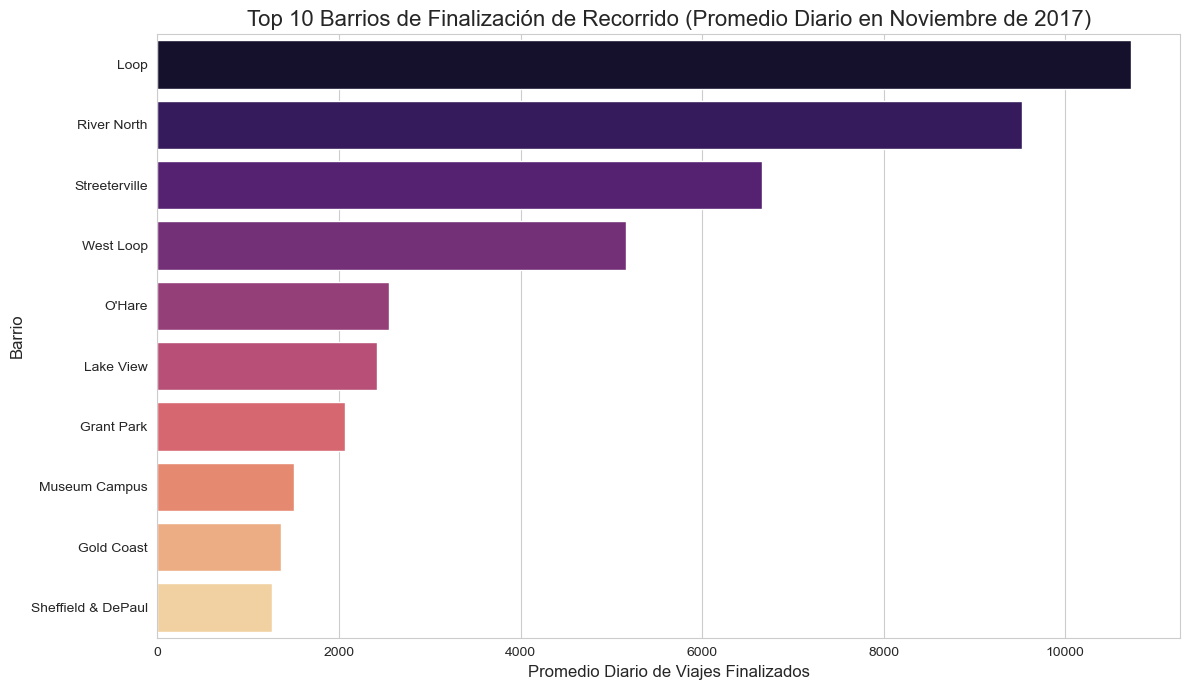

In [10]:
top_10_neighborhoods = average_trips_by_neighborhood.sort_values(
    by='average_trips', 
    ascending=False
).head(10)
plt.figure(figsize=(12, 7))
sns.barplot(
    x='average_trips', 
    y='dropoff_location_name', 
    data=top_10_neighborhoods,
    palette='magma' 
)
plt.title(
    'Top 10 Barrios de Finalización de Recorrido (Promedio Diario en Noviembre de 2017)', 
    fontsize=16
)
plt.xlabel('Promedio Diario de Viajes Finalizados', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

# Análisis de Datos y Conclusiones para Zuber

## Paso 1: Estudio de la Competencia (Empresas de Taxis)

El análisis se basa en la cantidad de viajes que hace cada compañia de los dias **15 y 16 de noviembre de 2017**.

### 1.1. Gráfico: Número de Viajes por Compañía

### 1.2. Conclusiones Clave

**Análisis de la Competencia:**

1.  **Análisis de Mercado:**. Las primeras cuatro empresas manejan extremadamente una gran volumen de viajes que incluso las primeras 4 empresas abarcan juntas mas de la mitad del total de viajes realizados.
2.  **Competidor Principal:** **Flash Cab** es el competidor mas grande que tiene hasta ahora y ee el mayor desafío para Zuber.
3.  **Estrategia para Zuber:** La estrategia prcipañ de Zuber debe de eonforcarse directamente a **diferenciarse** de estas grandes flotas tradicionales, posiblemente a través de precios dinámicos, mejor experiencia del usuario, o un servicio más eficiente en áreas de alta demanda.

---

## Paso 2: Estudio de la Demanda Geográfica (Barrios de Destino)

El análisis se basa en el **promedio diario de viajes que finalizaron en cada barrio** durante noviembre de 2017.

### 2.1. Gráfico: Top 10 Barrios de Finalización de Recorrido

### 2.2. Conclusiones Clave

El gráfico muestra una **demanda abrumadoramente concentrada** en las zonas céntricas, lo que define la estrategia operativa de Zuber.

**Análisis de la Demanda:**

1.  **Foco de concentración:** Los barrios del **"Top 4" (Loop, River North, Streeterville, West Loop)** son los vencindadrios de mayor demanda. La diferencia de viajes entre el Loop y O'Hare (puesto 5) es de más del 300%.
2.  **Prioridad Operativa:** Zuber debe asegurar la **máxima disponibilidad y tiempos de espera mínimos** en las intersecciones de estos cuatro barrios. Esta es la clave para tener una mayor presencia en el mercado.
3.  **Demanda de Transporte Clave:** El **Aeropuerto O'Hare** es un destino de alto volumen (puesto 5), pero solo después del denso núcleo urbano. Debe haber una estrategia clara de servicio al aeropuerto (tarifas planas, colas), pero sin sacrificar la cobertura del Top 4.
4.  **Demanda Secundaria:** Barrios como **Lake View** y **Grant Park** presentan una demanda significativa, pero mucho menor. Se deben cubrir para el servicio general, pero no deberia de ser la prioridad para el despliegue masivo inicial.

---

## Estrategia Recomendada para Zuber (Resumen)

| Aspecto | Conclusión de Datos | Estrategia Operativa |
| :--- | :--- | :--- |
| **Despliegue de Vehículos** | Demanda concentrada en el Top 4 (Loop, River North, Streeterville, West Loop). | **Sobrecargar la flota** en el núcleo urbano. Usar precios dinámicos para **dirigir a los conductores** a estas zonas, especialmente en las horas pico. |
| **Competencia** | Flash Cab, Taxi Affiliation Services, Medallion y Yellow Cab dominan el mercado. | Estrategias de **adquisición de clientes agresivas** (cupones de viaje, programas de fidelización) dirigidas a los usuarios de la competencia. |
| **Conexiones Clave** | O'Hare es importante, pero no domina la demanda. | Asegurar una **conexión fluida y buena publicidad** con O'Hare, con tarifas o incentivos claros, pero manteniendo la mayor parte de la flota en el centro. |

In [12]:
from scipy import stats as st
data_for_hypothesis = pd.read_csv('/Users/lcamacho/Triple Ten/Sprint 8/moved_project_sql_result_07.csv')
alpha = 0.05


In [13]:
sample_bad_weather = data_for_hypothesis.query('weather_conditions == "Bad"')['duration_seconds']
sample_good_weather = data_for_hypothesis.query('weather_conditions == "Good"')['duration_seconds']
print(f"Muestra 'Bad' (Lluvioso): {len(sample_bad_weather)} viajes")
print(f"Muestra 'Good' (Buen Tiempo): {len(sample_good_weather)} viajes")

Muestra 'Bad' (Lluvioso): 180 viajes
Muestra 'Good' (Buen Tiempo): 888 viajes


In [14]:
results = st.ttest_ind(
    sample_bad_weather, 
    sample_good_weather, 
    equal_var=False
)
p_value = results.pvalue
print(f"Valor p (p-value) obtenido: {p_value:.10f}")

Valor p (p-value) obtenido: 0.0000000000


In [15]:
if p_value < alpha:
    print(f"\nResultado: El valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("-> RECHAZAMOS LA HIPÓTESIS NULA.")
    print("Existe una diferencia estadísticamente significativa en la duración promedio de los viajes entre los sábados lluviosos y los de buen tiempo.")
else:
    print(f"\nResultado: El valor p ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("-> NO RECHAZAMOS LA HIPÓTESIS NULA.")
    print("No hay evidencia estadística suficiente para afirmar que el clima afecta la duración promedio de los viajes.")


Resultado: El valor p (0.0000) es menor que el nivel de significancia (0.05).
-> RECHAZAMOS LA HIPÓTESIS NULA.
Existe una diferencia estadísticamente significativa en la duración promedio de los viajes entre los sábados lluviosos y los de buen tiempo.


In [16]:
mean_bad = sample_bad_weather.mean()
mean_good = sample_good_weather.mean()
print(f"Duración promedio (Clima 'Bad'): {mean_bad:.2f} segundos")
print(f"Duración promedio (Clima 'Good'): {mean_good:.2f} segundos")

Duración promedio (Clima 'Bad'): 2427.21 segundos
Duración promedio (Clima 'Good'): 1999.68 segundos


# Prueba de Hipótesis: Impacto del Clima en la Duración de los Viajes (Loop a O'Hare)

## 1. Planteamiento de Hipótesis

El objetivo era probar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare cambia en los sábados lluviosos (condición "Bad") en comparación con los sábados de buen tiempo (condición "Good").

## 2. Criterio de Prueba y Justificación

### Nivel de Significancia ($\alpha$)

*   **Criterio:** $\alpha = 0.05$ (5%)
*   **Justificación:** Se seleccionó el umbral estándar de la industria. Implica que solo rechazaremos la hipótesis nula si la probabilidad de que la diferencia observada sea aleatoria es inferior al 5%.

### Método Estadístico

*   **Criterio:** **Prueba t de Student para muestras independientes** , utilizando el parámetro equal_var=False.
*   **Justificación:**
    1.  **Comparación de Medias:** El objetivo es comparar las medias de la duración de los viajes de dos grupos (muestras) **independientes** (los viajes en clima "Bad" son distintos de los viajes en clima "Good").
    2.  **Robustez:** Se eligió la variante equal_var=False porque **no asume** que las varianzas poblacionales de la duración de los viajes sean iguales entre los grupos. Esta es una suposición más segura y robusta en datos del mundo real.

### Criterio de Decisión

*   **Si p-value <  Alpha (0.05):** Rechazar Ho. La diferencia es estadísticamente significativa.
*   **Si p-value >= Alpha (0.05):** No rechazar Ho. No hay suficiente evidencia de una diferencia significativa.

## 3. Conclusiones e Interpretación de Resultados

### Resultados Obtenidos

Duración Promedio	2427.21 segundos (≈40.45min) Clima 'Bad' (Lluvia/Tormenta)
Duración Promedio   1999.68 segundos (≈33.33min) Clima 'Good' (Buen Tiempo)

### Conclusión de la Prueba de Hipótesis

Dado que el **valor p ($0.0000...$) es significativamente menor que el nivel de significancia ($\alpha=0.05$)**, **rechazamos la Hipótesis Nula ($H_0$)**.

**Interpretación:** Existe una **diferencia estadísticamente significativa** en la duración promedio de los viajes desde el Loop hasta O'Hare entre los sábados lluviosos y los sábados de buen tiempo.

### Interpretación Lógica para Zuber

La diferencia no solo es estadísticamente significativa, sino también **relevante a nivel de negocio**.

1.  **Impacto Directo:** Los viajes del Loop a O'Hare duran, en promedio, **más de 7 minutos adicionales** cuando las condiciones climáticas son adversas.
2.  **Justificación del Fenómeno:** Este aumento de tiempo es altamente lógico, ya que la lluvia y las tormentas provocan:
    *   Mayor congestión en las autopistas que conectan el centro con el aeropuerto.
    *   Reducción de la velocidad de conducción y aumento del tiempo de viaje.
    *   Un pico de demanda de viajes compartidos (lo que afecta la disponibilidad de conductores).
3.  **Implicaciones Operacionales:**
    *   **Gestión de Expectativas:** El sistema de Zuber debe usar el clima en tiempo real para **ajustar el Tiempo Estimado de Llegada**, comunicando a los pasajeros que el viaje será más largo de lo habitual.
    *   **Incentivos para Conductores:** El aumento de 7 minutos es tiempo no productivo para los conductores. Zuber debería implementar un **aumento en la tarifa dinámica** en días de mal tiempo para esta ruta. Esto compensa al conductor y ayuda a garantizar que haya suficientes vehículos dispuestos a aceptar el viaje más largo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Luis has realizado un análisis sólido y bien estructurado que combina con claridad los aspectos estadísticos con implicaciones prácticas para la operación de Zuber. La forma en que justificas el uso de la prueba t y el criterio de varianzas desiguales demuestra un buen manejo metodológico. 

Además, logras ir más allá del resultado numérico al explicar de forma lógica por qué el mal clima afecta significativamente la duración del viaje y cómo esta información puede integrarse en la estrategia operativa y la experiencia del usuario.


Para seguir fortaleciendo este tipo de análisis en trabajos futuros, podrías considerar realizar segmentaciones adicionales por hora del día o día del mes para detectar si hay momentos específicos en los que el impacto del clima es aún más marcado. Esto podría afinar la gestión dinámica de tarifas e incentivos.


</div>